In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
uploaded = files.upload()

Saving fake_or_real_news.csv to fake_or_real_news.csv


In [11]:
fk_nw = pd.read_csv(io.BytesIO(uploaded['fake_or_real_news.csv']))

print(fk_nw.shape)
fk_nw.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<Axes: xlabel='count', ylabel='label'>

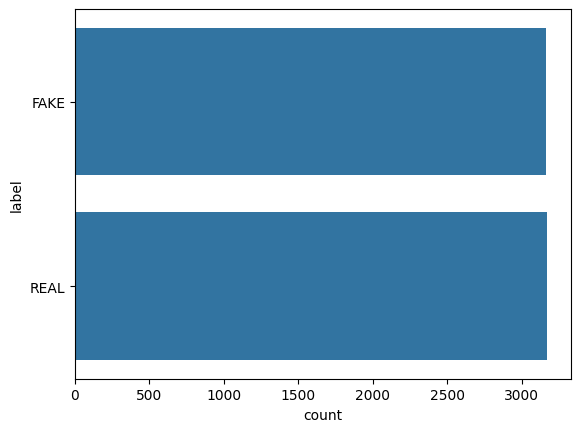

In [12]:
sns.countplot(fk_nw.label)

## Categorizando em 0 e 1

In [13]:
fk_nw.columns = ['IDR', 'Title', 'Text', 'Label']
fk_nw = fk_nw.replace('FAKE', 0)
fk_nw = fk_nw.replace('REAL', 1)

fk_nw['Text'] = fk_nw['Title']+' '+fk_nw['Text']
fk_nw.head()

,IDR,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,3608,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathy U....,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...,0
4,875,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...,1


In [14]:
news= fk_nw.drop(['IDR', 'Title'], axis= 1)
news.head()

,Text,Label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy U....,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1


## Removendo interferências

In [15]:
def limpa_texto(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\$+|www\.\s+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  return text

news['Text'] = news['Text'].apply(lambda x:limpa_texto(x))
news.head()

,Text,Label
0,you can smell hillary’s fear daniel greenfield...,0
1,watch the exact moment paul ryan committed pol...,0
2,kerry to go to paris in gesture of sympathy us...,1
3,bernie supporters on twitter erupt in anger ag...,0
4,the battle of new york why this primary matter...,1


## Retornando a raiz da palavra

In [16]:
def radical_palavra(text):
  rdp = nltk.stem.WordNetLemmatizer()
  rad = ' '.join([rdp.lemmatize(word) for word in text.split()])
  return rad

news['Text'] = news['Text'].apply(radical_palavra)
news.head()

,Text,Label
0,you can smell hillary’s fear daniel greenfield...,0
1,watch the exact moment paul ryan committed pol...,0
2,kerry to go to paris in gesture of sympathy u ...,1
3,bernie supporter on twitter erupt in anger aga...,0
4,the battle of new york why this primary matter...,1


## Dividindo em treino e teste

In [22]:
X_treino, X_teste, y_treino, y_teste = train_test_split(news['Text'], news['Label'], test_size=0.25,random_state=42)


## Extração de Features

In [24]:
data_tf = TfidfVectorizer(stop_words='english', max_df=0.7)

data_tf_treino = data_tf.fit_transform(X_treino)
data_tf_teste = data_tf.transform(X_teste)
data_tf_treino

<4751x92614 sparse matrix of type '<class 'numpy.float64'>'
	with 1181967 stored elements in Compressed Sparse Row format>

## Naive Bayes

In [25]:
nb_classificador = MultinomialNB()
nb_classificador.fit(data_tf_treino,y_treino)

pred =nb_classificador.predict(data_tf_teste)

## Métricas

In [26]:
print(classification_report(y_teste, pred, target_names=["Fake", "True"]))

acuracia = accuracy_score(y_teste, pred)
matriz_conf = confusion_matrix(y_teste, pred)

print(acuracia)
print('\n')
print(matriz_conf)

              precision    recall  f1-score   support

        Fake       0.96      0.73      0.83       794
        True       0.78      0.97      0.87       790

    accuracy                           0.85      1584
   macro avg       0.87      0.85      0.85      1584
weighted avg       0.87      0.85      0.85      1584

0.8491161616161617


[[576 218]
 [ 21 769]]


In [18]:


X_treino, X_teste, y_treino, y_teste = train_test_split(news['Text'], news['Label'], test_size=0.25,random_state=42)

# Vetorização dos documentos
vectorizer = CountVectorizer()
X_treino = vectorizer.fit_transform(X_treino)
X_teste = vectorizer.transform(X_teste)

# Treinamento do modelo Naive Bayes
modelo_naive_bayes = MultinomialNB()
modelo_naive_bayes.fit(X_treino, y_treino)

# Realizar previsões no conjunto de teste
previsoes = modelo_naive_bayes.predict(X_teste)

# Avaliação do desempenho do modelo
acuracia = accuracy_score(y_teste, previsoes)
relatorio_classificacao = classification_report(y_teste, previsoes)

print("Acurácia:", acuracia)
print("Relatório de Classificação:\n", relatorio_classificacao)


Acurácia: 0.8983585858585859
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       794
           1       0.89      0.91      0.90       790

    accuracy                           0.90      1584
   macro avg       0.90      0.90      0.90      1584
weighted avg       0.90      0.90      0.90      1584

